# Problem Set 7: Plotting and grouping
We're continuing the last problem set in this one, but getting a bit fancier with the plotting and grouping.  

0) Duplicate your code that read in the StarkData.csv (or .xlsx) file and calculated the LDI and Recognition metrics (but skip the plots you did before)

1) Next, write a function that will plot bars with error-bars:

```
def BarsByAge(data, metric, axis_handle=None):
```

This function should take your data frame, a metric (e.g., 'RAVLT'), and optionally a handle to an axis and should plot a bar graph of means +/- the standard error of the mean broken down by AgeGroup (or decade).  

$ SEM\left(x\right)=\frac{stdev\left(x\right)}{\sqrt{N}} $


So, that's the standard deviation of the measurement divided by the square root of the number of observations.  Or, have a look in _scipy_ and find the function for `sem` - your call.

***For bonus points, label the bars not by 1, 2, 3, 4 but by 20-39, 40-59, 60-74, and 75-89 or by decade (20s, 30s, 40s, ... 80s).***

Sample call and output:

```
BarsByAge(data,'LDI')
```
![PS_Pandas2_fig1.png](https://github.com/celstark/n247data/raw/main/data/PS_Pandas2_fig1.png)

2) Once that is going, in your main code, call upon this function 3 times to plot a 3-panel figure (i.e., use _plt.subplots()_) that has the RAVLT, LDI, and Recognition scores plotted.

3) Write a function that will show a scatter-plot with the linear regression line.  For normal-credit this will not have to deal with subplots.  For bonus kudos, make it handle subplots.  So either of:

```
def ScatterWithLine(data,xmetric,ymetric):

def ScatterWithLine(data,xmetric,ymetric,axis_handle=None):
```
So, we might call:

```
ScatterWithLine(data,'Age','LDI')
```
![scatter1](https://github.com/celstark/n247data/raw/main/data/PS_Pandas2_fig2.png)

Have a look at `np.polyfit()` and `np.polyval()`. You can use these to determine the linear (1st-order) fit and determine the y-values to plot.  Hint: when plotting the line, you don't need to plot the actual xmetric.  So, here, when plotting the line, we don't need to use Age, we could use some nice linearly-spaced vector (ahem) that spanned the range of Age. Hint2: If you do this, look to _pyplot_ to add the line rather than Pandas. 

For those of you doing the bonus version, you should be able to make a 2-panel plot like this:

```
ScatterWithLine(data,'Age','LDI',axes[0])
ScatterWithLine(data,'Age','Recog',axes[1])
```

![scatter1](https://github.com/celstark/n247data/raw/main/data/PS_Pandas2_fig3.png)


You'll bang into the fact that Pandas lets you specify an axis in the plotting calls while pyplot doesn't (but their axes have plotting calls).

In [37]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import requests #extra
import io #extra
from scipy import stats

csvfname='https://raw.githubusercontent.com/celstark/n247data/main/data/StarkData.csv'

s = requests.get(csvfname).content
data = pd.read_csv(io.StringIO(s.decode('utf-8')))

In [40]:
''' 1) compute 2 metrics from the data and store them in the data frame:
- LDI = pS_L - pS_F
- Recognition = pO_R - pO_F '''

data['LDI'] = data['pS_L'] -  data['pS_F']
data['Recognition'] = data['pO_R'] -  data['pO_F']

In [69]:
def BarsByAge(df, metric, axis_handle=None): 
    '''take in df, a metric (e.g., 'RAVLT'), and optionally a handle to an axis 
    and should plot a bar graph of means +/- the standard error of the mean broken 
    down by AgeGroup (or decade).  '''


    age_group = df.groupby('AgeGroup')

    # std = age_group[metric].std() / np.sqrt(age_group[metric].count())
    std = age_group[metric].apply(scipy.stats.sem)

    ax = age_group[metric].mean().plot.bar(x = 'AgeGroup', y = metric, rot=0, color=['pink', 'orange', 'yellow', 'lightgreen', 'lightblue'], yerr=std)

    #if axis_handle = True: 



    return ax


<Axes: xlabel='AgeGroup'>

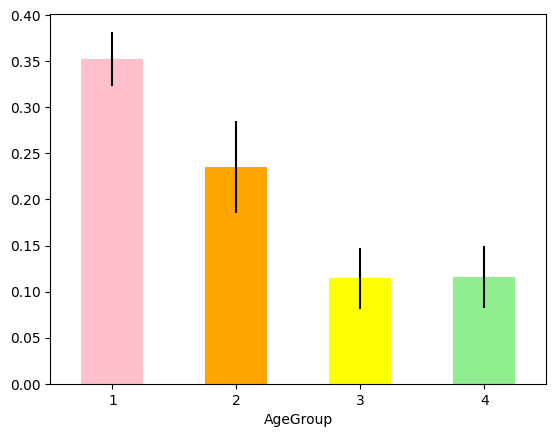

In [70]:
BarsByAge(data, 'LDI')

NameError: name 'x' is not defined

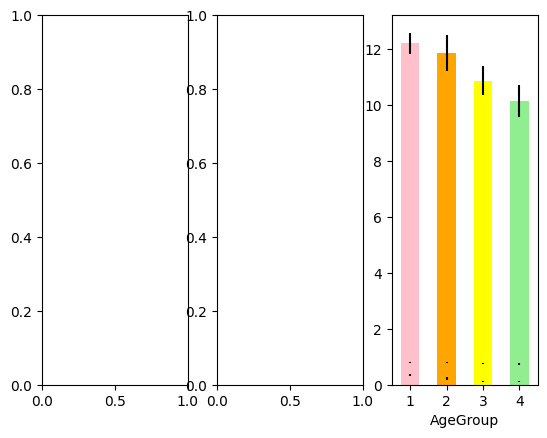

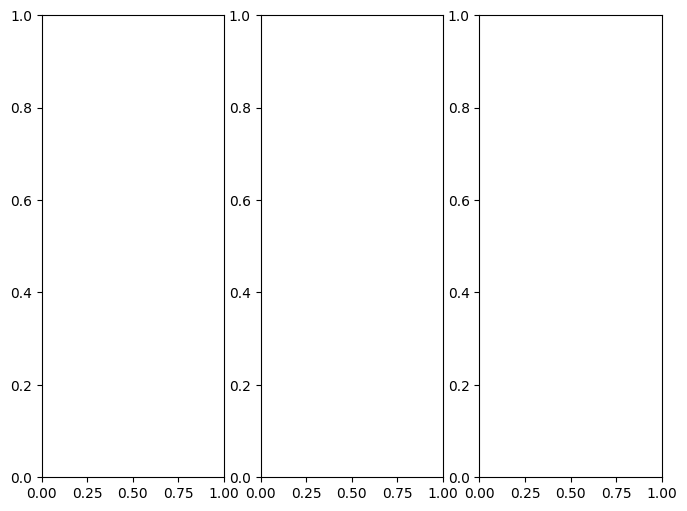

In [83]:
plt.subplots(1, 3)
'''call upon this function 3 times 
to plot a 3-panel figure that has the RAVLT, LDI, and Recognition scores plotted.'''


ax1 = BarsByAge(data, 'RAVLT')
ax2 = BarsByAge(data, 'LDI')
ax3 = BarsByAge(data, 'Recognition')


fig, axes = plt.subplots(1, 3, figsize=(8,6))
ax1.plot(x, y)
ax2.plot(x, -y)
ax3.plot(x, -y)
plt.tight_layout()

